In [1]:
# ------------------------------------------------------------
# ---------------- Data Manipulation -------------------------
# ------------------------------------------------------------
import pandas as pd

# ------------------------------------------------------------
# ---------------- Data Visualization ------------------------
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../scripts/simulations.csv')

# Drop useless column
df = df.drop('Unnamed: 0', axis=1)

# Drop rows where the ambulance couldn't reach in less than 9 minutes
df = df.drop(df[df.ambulance_arrival_time == -1].index)

- TL: Traffic Lights prioritize ambulance's path
- GL: Normal vehicles give lane to the ambulance
- NH: ERU selects nearest hospital to send ambulance
- FR: Full Responsive - Uses all of the strategies above
- NA: None of the above

In [3]:
df.head()

,iteration,can_change_lane,can_open_traffic,can_find_nearest_hospital,number_of_vehicles,ambulance_arrival_time
0,#16,False,False,False,225,186
1,#6,False,True,False,506,302
2,#3,False,True,False,225,95
3,#21,False,True,False,225,93
4,#23,False,False,True,787,195


In [4]:
def give_simulation_name(df):
    if df.can_change_lane and df.can_open_traffic and df.can_find_nearest_hospital:
        df['name'] = 'RC'
    if df.can_change_lane and not df.can_open_traffic and not df.can_find_nearest_hospital:
        df['name'] = 'AP'
    if not df.can_change_lane and df.can_open_traffic and not df.can_find_nearest_hospital:
        df['name'] = 'AS'
    if not df.can_change_lane and not df.can_open_traffic and df.can_find_nearest_hospital:
        df['name'] = 'EH'
    if not df.can_change_lane and not df.can_open_traffic and not df.can_find_nearest_hospital:
        df['name'] = 'NA'
    return df
    
df = df.apply(give_simulation_name, axis=1)

## Calculate average arrival time by simulation type

In [5]:
df.groupby(['name', 'number_of_vehicles']).mean().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital'], axis = 1)

ambulance_arrival_time
name number_of_vehicles                        
AP   225                             143.250000
     506                             224.812500
     787                             222.193548
AS   225                             111.031250
     506                             149.625000
     787                             188.062500
EH   225                             199.937500
     506                             233.250000
     787                             274.125000
NA   225                             190.843750
     506                             257.062500
     787                             283.933333
RC   225                              78.781250
     506                             161.343750
     787                             235.468750

## Calculate average arrival time by number of vehicles

df.groupby(['number_of_vehicles']).mean().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital'], axis = 1)

In [6]:
df.describe()

,number_of_vehicles,ambulance_arrival_time
count,477.000000,477.000000
mean,504.232704,196.496855
std,229.308181,106.387227
min,225.000000,48.000000
25%,225.000000,107.000000
50%,506.000000,188.000000
75%,787.000000,241.000000
max,787.000000,511.000000


# Analyzing the travel times for each vehicle density

In [7]:
colors = sns.color_palette("bright", 5)

## 100 vehicles/km²

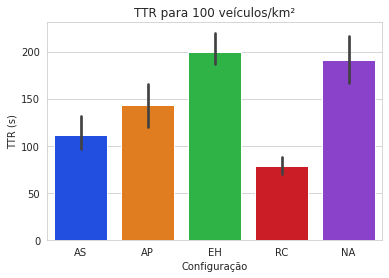

In [8]:
df_100 = df.drop(df[df.number_of_vehicles != 225].index)

# Create the bar graph using seaborn
sns.set_style('whitegrid')
sns.barplot(x='name', y='ambulance_arrival_time',
            order=['AS', 'AP', 'EH', 'RC', 'NA'], palette=colors, data=df_100)

# Add title and axis labels
plt.title('TTR para 100 veículos/km²')
plt.xlabel('Configuração')
plt.ylabel('TTR (s)')

# Display the graph
plt.show()

## 200 vehicles/km²

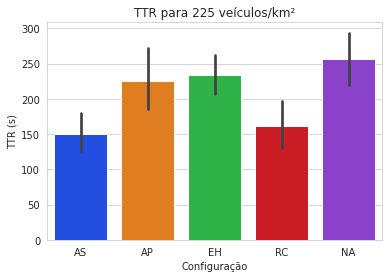

In [12]:
## df_225 = df.drop(df[df.number_of_vehicles != 506].index)

# Create the bar graph using seaborn
sns.set_style('whitegrid')
sns.barplot(x='name', y='ambulance_arrival_time', 
            order=['AS', 'AP', 'EH', 'RC', 'NA'], palette=colors, data=df_225)

# Add title and axis labels
plt.title('TTR para 225 veículos/km²')
plt.xlabel('Configuração')
plt.ylabel('TTR (s)')

# Display the graph
plt.show()

## 300 vehicles/km²

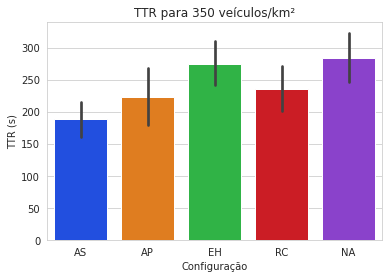

In [10]:
df_350 = df.drop(df[df.number_of_vehicles != 787].index)

# Create the bar graph using seaborn
sns.set_style('whitegrid')
sns.barplot(x='name', y='ambulance_arrival_time',
            order=['AS', 'AP', 'EH', 'RC', 'NA'], palette=colors, data=df_350)

# Add title and axis labels
plt.title('TTR para 350 veículos/km²')
plt.xlabel('Configuração')
plt.ylabel('TTR (s)')

# Display the graph
plt.show()

## All together

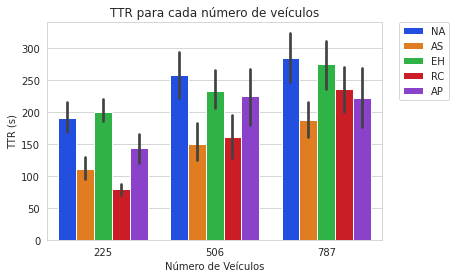

In [11]:
# Create the bar graph using seaborn
sns.barplot(x='number_of_vehicles', y='ambulance_arrival_time', hue='name', palette=colors, data=df)

# Add title and axis labels
plt.title('TTR para cada número de veículos')
plt.xlabel('Número de Veículos')
plt.ylabel('TTR (s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the graph
plt.show()